In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ahrs.filters import QUEST

In [34]:
df = pd.read_csv('../utils/spiral_data/sensor_data_down_b.csv')
acc = np.array([
    df['Accel_X'],
    df['Accel_Y'],
    df['Accel_Z']
]).T
mag = np.array([
    df['Magneto_X'],
    df['Magneto_Y'],
    df['Magneto_Z']
]).T

print(f'Measurements from accelorometer: {acc.shape}')
print(f'Measurements from magnetometer: {mag.shape}')

df.head()

Measurements from accelorometer: (4298, 3)
Measurements from magnetometer: (4298, 3)


,Accel_X,Accel_Y,Accel_Z,Magneto_X,Magneto_Y,Magneto_Z,Gyro_X,Gyro_Y,Gyro_Z,Gravity_X,Gravity_Y,Gravity_Z,Quaternion_W,Quaternion_X,Quaternion_Y,Quaternion_Z,Pressure,Temperature,Time
0,0.92,3.57,9.07,-27.1875,-23.6875,-42.5000,-5.3750,-2.5625,5.5625,0.96,3.61,9.06,0.958740,0.172546,-0.089050,-0.207642,83064.851562,23.358643,39437.0
1,1.02,3.57,9.06,-28.6875,-23.0000,-42.8750,-5.4375,-2.1250,5.3750,0.99,3.57,9.07,0.959351,0.170410,-0.089661,-0.206177,100619.148438,24.543093,39477.0
2,0.96,3.30,9.05,-28.6875,-23.0000,-42.8750,-5.8125,-1.9375,4.5000,1.00,3.54,9.08,0.959961,0.168274,-0.090210,-0.205078,100618.359375,24.563293,39517.0
3,1.19,3.46,9.00,-28.6875,-22.5625,-41.7500,-2.8125,-1.7500,2.8125,1.03,3.51,9.09,0.960266,0.167053,-0.090881,-0.204346,100617.882812,24.595760,39557.0
4,1.09,3.38,9.04,-29.3750,-23.2500,-42.1875,-3.1250,0.0000,3.4375,1.04,3.49,9.10,0.960632,0.165955,-0.090942,-0.203369,100616.453125,24.629921,39597.0


In [18]:
quest = QUEST()

In [21]:
q = quest.estimate(acc=acc, mag=mag)

ValueError: operands could not be broadcast together with shapes (12894,3) (3,12894) 

AttributeError: 'function' object has no attribute 'shape'

In [29]:
# Ensure data is in correct shape
acc = np.array(acc)  # Shape: (N, 3)
mag = np.array(mag)  # Shape: (N, 3)

assert acc.shape[1] == 3, "Accelerometer data must be (N, 3)"
assert mag.shape[1] == 3, "Magnetometer data must be (N, 3)"

q=[]

# If processing multiple measurements, process one at a time
for i in range(len(acc)):
    acc_i = acc[i:i+1]  # Take single measurement
    mag_i = mag[i:i+1]  # Take single measurement
    q_i = quest.estimate(acc=acc_i, mag=mag_i)
    q.append(q_i)

q = np.array(q)

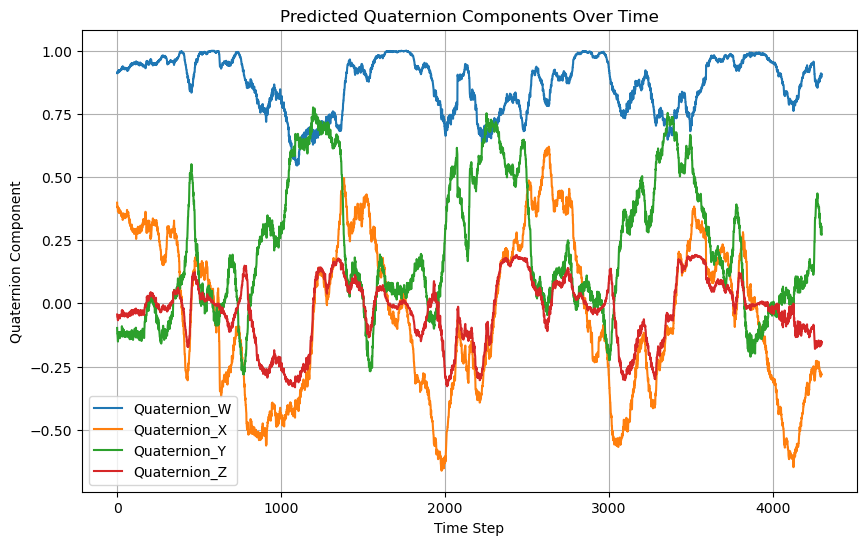

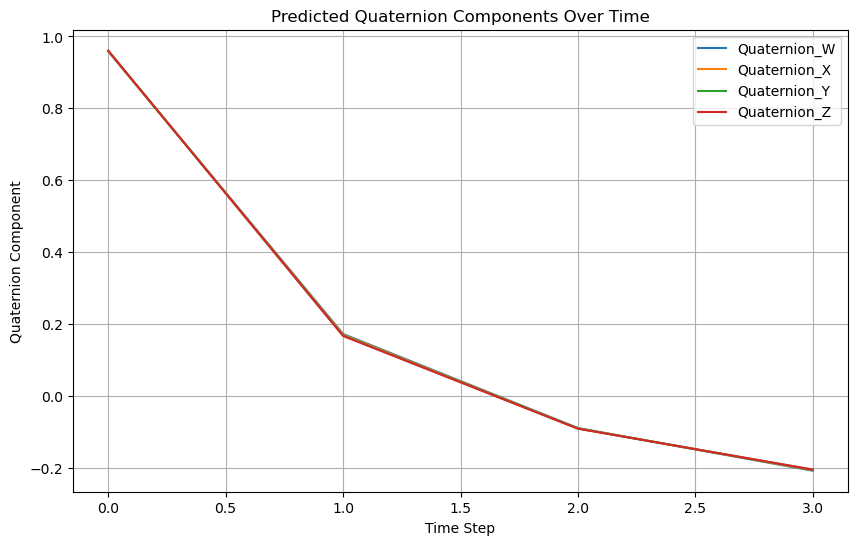

In [33]:
from kalman import *

measured_q = np.array([
    df['Quaternion_W'],
    df['Quaternion_X'],
    df['Quaternion_Y'],
    df['Quaternion_Z'],
])
plot_predicted_quaternions(q)
plot_predicted_quaternions(measured_q)